### Task # 19:
- This is Task # 19 overall, but task 9 of Week 7
### Task # 04:

### Datasets Selected are Iris and Mall Customers

### Iris Dataset :

In [1]:
#importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore the specific UserWarning related to KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

### Step 1 and 2 :

In [2]:
#importing the dataset
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   Target  
0       0  
1       0  
2       0

In [3]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

In [4]:
#check for Null Values
iris_df.columns[iris_df.isnull().any()]

Index([], dtype='object')

In [5]:
#basic Statistics
iris_df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
Target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

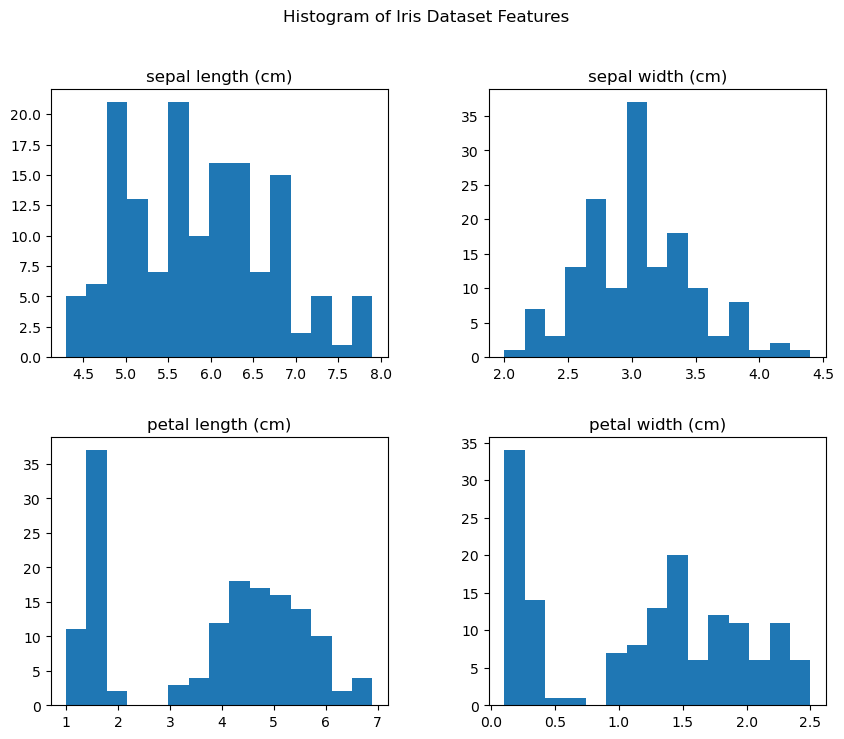

In [6]:
# Plot the distribution of features
iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].hist(bins=15, figsize=(10, 8), grid=False)
plt.suptitle("Histogram of Iris Dataset Features")
plt.show()

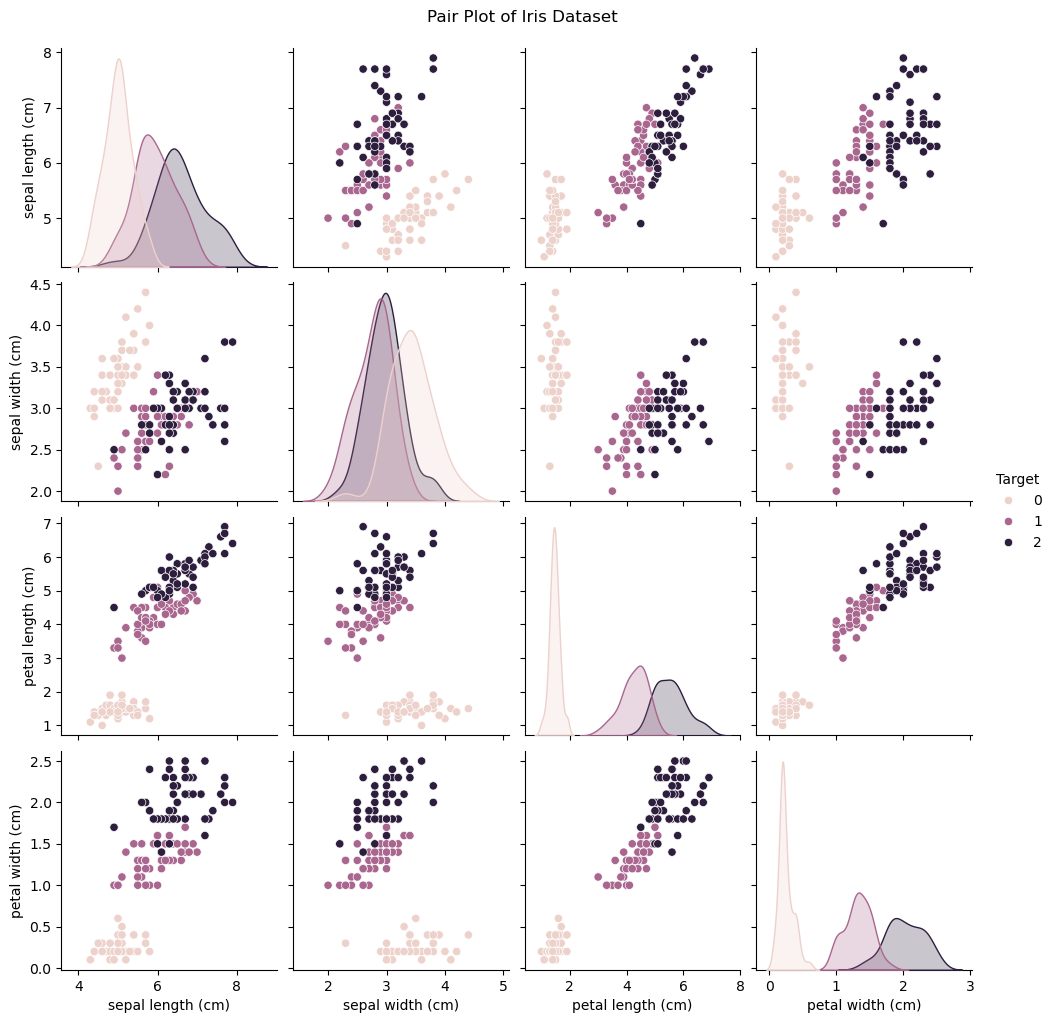

In [7]:
# Pair plot to explore relationships between features
sns.pairplot(iris_df, hue='Target')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

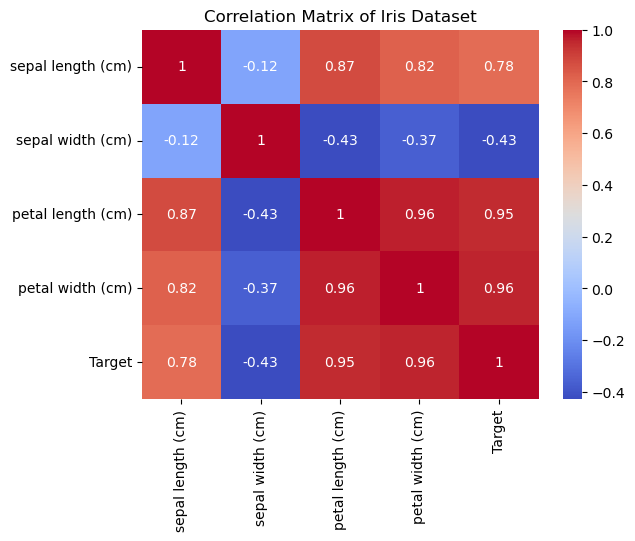

In [8]:
# Compute and display the correlation matrix
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

### Step 3 :

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the features for clustering
X_iris = iris_df.drop(columns=['Target'])

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_iris)
    inertia.append(kmeans.inertia_)

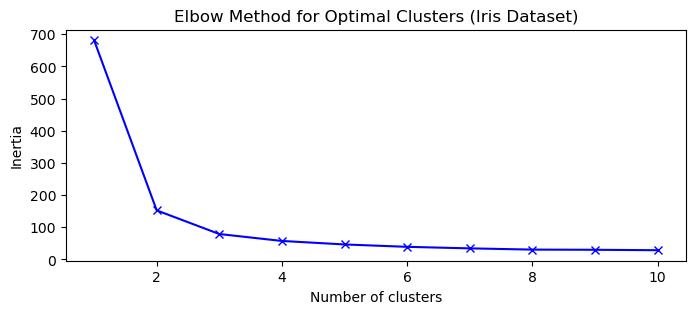

In [10]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 3))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (Iris Dataset)')
plt.show()

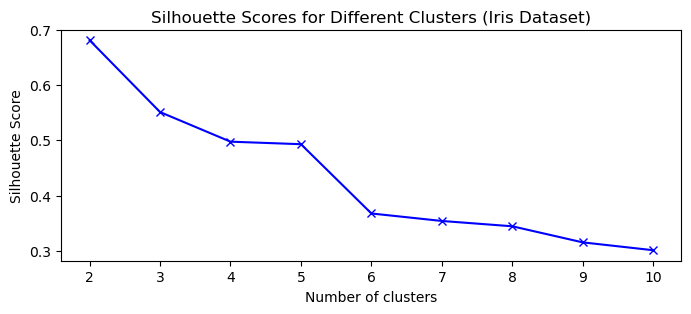

In [11]:
# Calculating Silhouette Scores for different cluster numbers
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_iris)
    sil_scores.append(silhouette_score(X_iris, clusters))

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), sil_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clusters (Iris Dataset)')
plt.show()

### Step 4 :

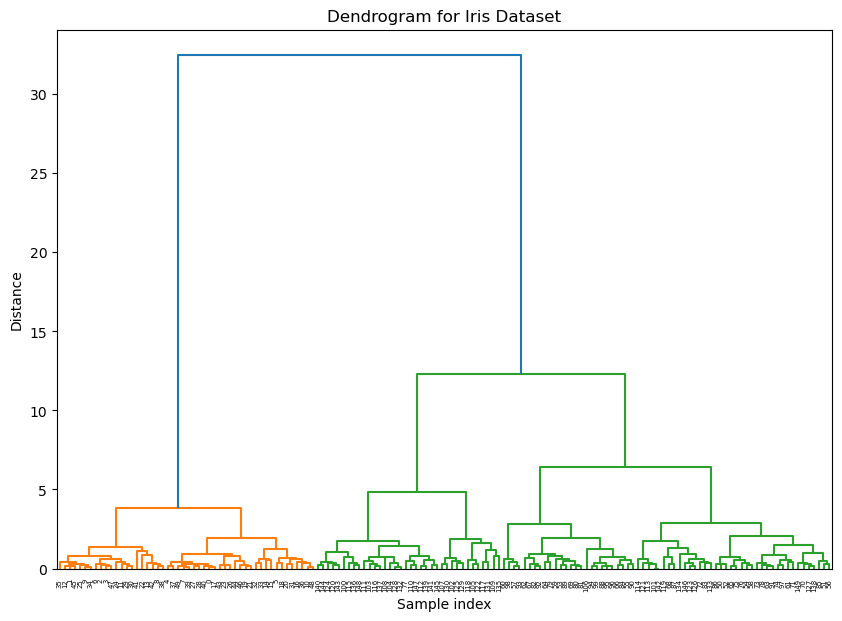

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
Z_iris = linkage(X_iris, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_iris)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Applying Agglomerative Clustering with optimal clusters (based on dendrogram)
optimal_clusters_iris = 3  # Replace with the number of clusters you determine from the dendrogram
agg_clustering_iris = AgglomerativeClustering(n_clusters=optimal_clusters_iris, linkage='ward')
iris_clusters = agg_clustering_iris.fit_predict(X_iris)

### Step 5 :

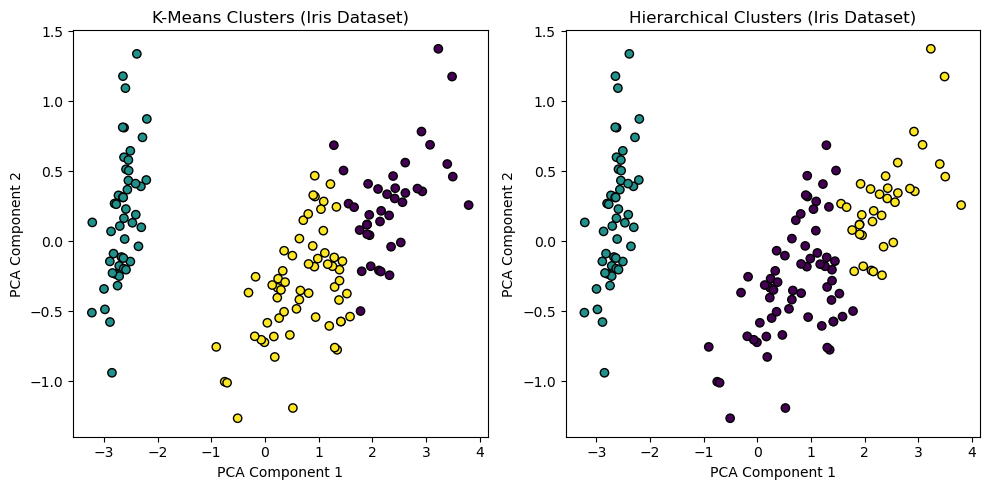

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce the Iris dataset to 2 dimensions
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_iris)

# K-Means Clustering
kmeans_iris = KMeans(n_clusters=optimal_clusters_iris, random_state=42)
kmeans_iris_labels = kmeans_iris.fit_predict(X_iris)

# Visualizing the K-Means clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_iris_labels, cmap='viridis', edgecolor='k')
plt.title('K-Means Clusters (Iris Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Hierarchical Clustering
# Assuming 'iris_clusters' holds the labels from the hierarchical clustering
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_clusters, cmap='viridis', edgecolor='k')
plt.title('Hierarchical Clusters (Iris Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

### Step 6 :

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score for K-Means (Iris)
silhouette_kmeans_iris = silhouette_score(X_iris, kmeans_iris_labels)
print(f'Silhouette Score for K-Means (Iris Dataset): {silhouette_kmeans_iris}')

# Silhouette Score for Hierarchical Clustering (Iris)
silhouette_hierarchical_iris = silhouette_score(X_iris, iris_clusters)
print(f'Silhouette Score for Hierarchical Clustering (Iris Dataset): {silhouette_hierarchical_iris}')

# Davies-Bouldin Index for K-Means (Iris)
dbi_kmeans_iris = davies_bouldin_score(X_iris, kmeans_iris_labels)
print(f'Davies-Bouldin Index for K-Means (Iris Dataset): {dbi_kmeans_iris}')

# Davies-Bouldin Index for Hierarchical Clustering (Iris)
dbi_hierarchical_iris = davies_bouldin_score(X_iris, iris_clusters)
print(f'Davies-Bouldin Index for Hierarchical Clustering (Iris Dataset): {dbi_hierarchical_iris}')

Silhouette Score for K-Means (Iris Dataset): 0.5511916046195919
Silhouette Score for Hierarchical Clustering (Iris Dataset): 0.554323661129642
Davies-Bouldin Index for K-Means (Iris Dataset): 0.6660385791628491
Davies-Bouldin Index for Hierarchical Clustering (Iris Dataset): 0.656256454064201


### Step 7 :

In [36]:
X_iris['KMeans_Cluster'] = kmeans_iris_labels
X_iris['Hierarchical_Cluster'] = iris_clusters

In [39]:
# Group by clusters and calculate mean values for K-Means
kmeans_cluster_summary = X_iris.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Summary:")
kmeans_cluster_summary

K-Means Cluster Summary:


sepal length (cm)  sepal width (cm)  petal length (cm)  \
KMeans_Cluster                                                           
0                        6.853846          3.076923           5.715385   
1                        5.006000          3.428000           1.462000   
2                        5.883607          2.740984           4.388525   

                petal width (cm)  Hierarchical_Cluster  
KMeans_Cluster                                          
0                       2.053846              1.846154  
1                       0.246000              1.000000  
2                       1.434426              0.000000

In [40]:
# Group by clusters and calculate mean values for Hierarchical Clustering
hierarchical_cluster_summary = X_iris.groupby('Hierarchical_Cluster').mean()
print("Hierarchical Clustering Summary:")
hierarchical_cluster_summary

Hierarchical Clustering Summary:


sepal length (cm)  sepal width (cm)  petal length (cm)  \
Hierarchical_Cluster                                                           
0                              5.920312          2.751562           4.420312   
1                              5.006000          3.428000           1.462000   
2                              6.869444          3.086111           5.769444   

                      petal width (cm)  KMeans_Cluster  
Hierarchical_Cluster                                    
0                             1.434375         1.90625  
1                             0.246000         1.00000  
2                             2.105556         0.00000

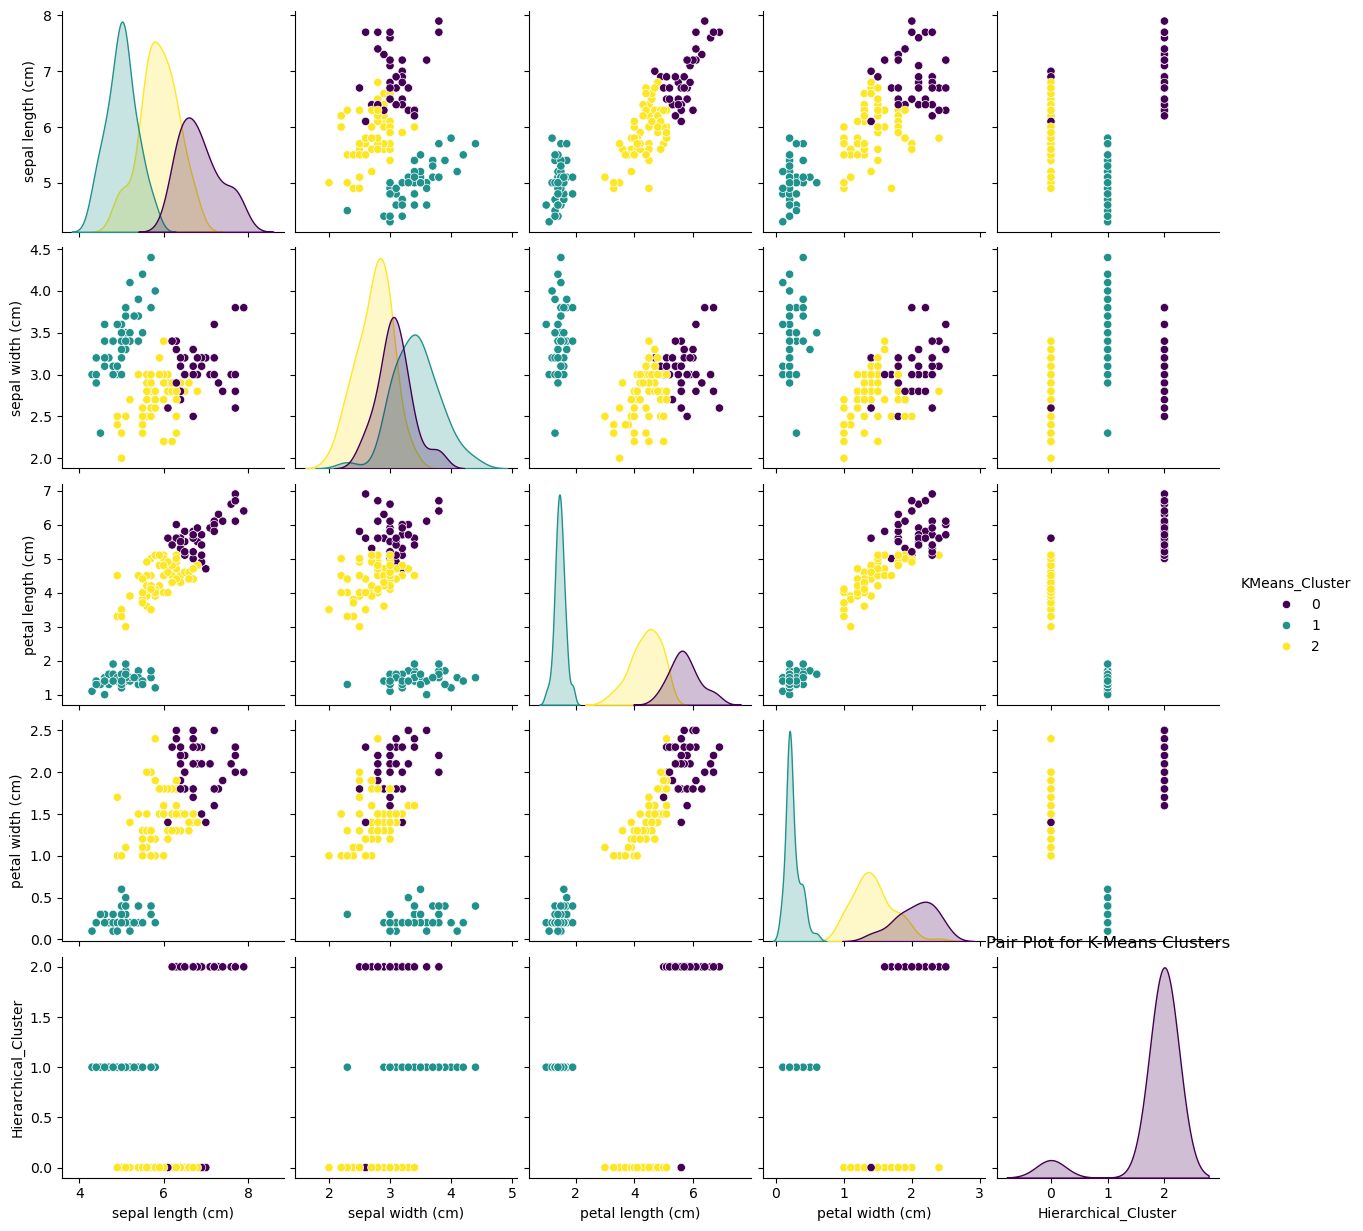

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with KMeans clusters
sns.pairplot(X_iris, hue='KMeans_Cluster', palette='viridis')
plt.title('Pair Plot for K-Means Clusters')
plt.show()

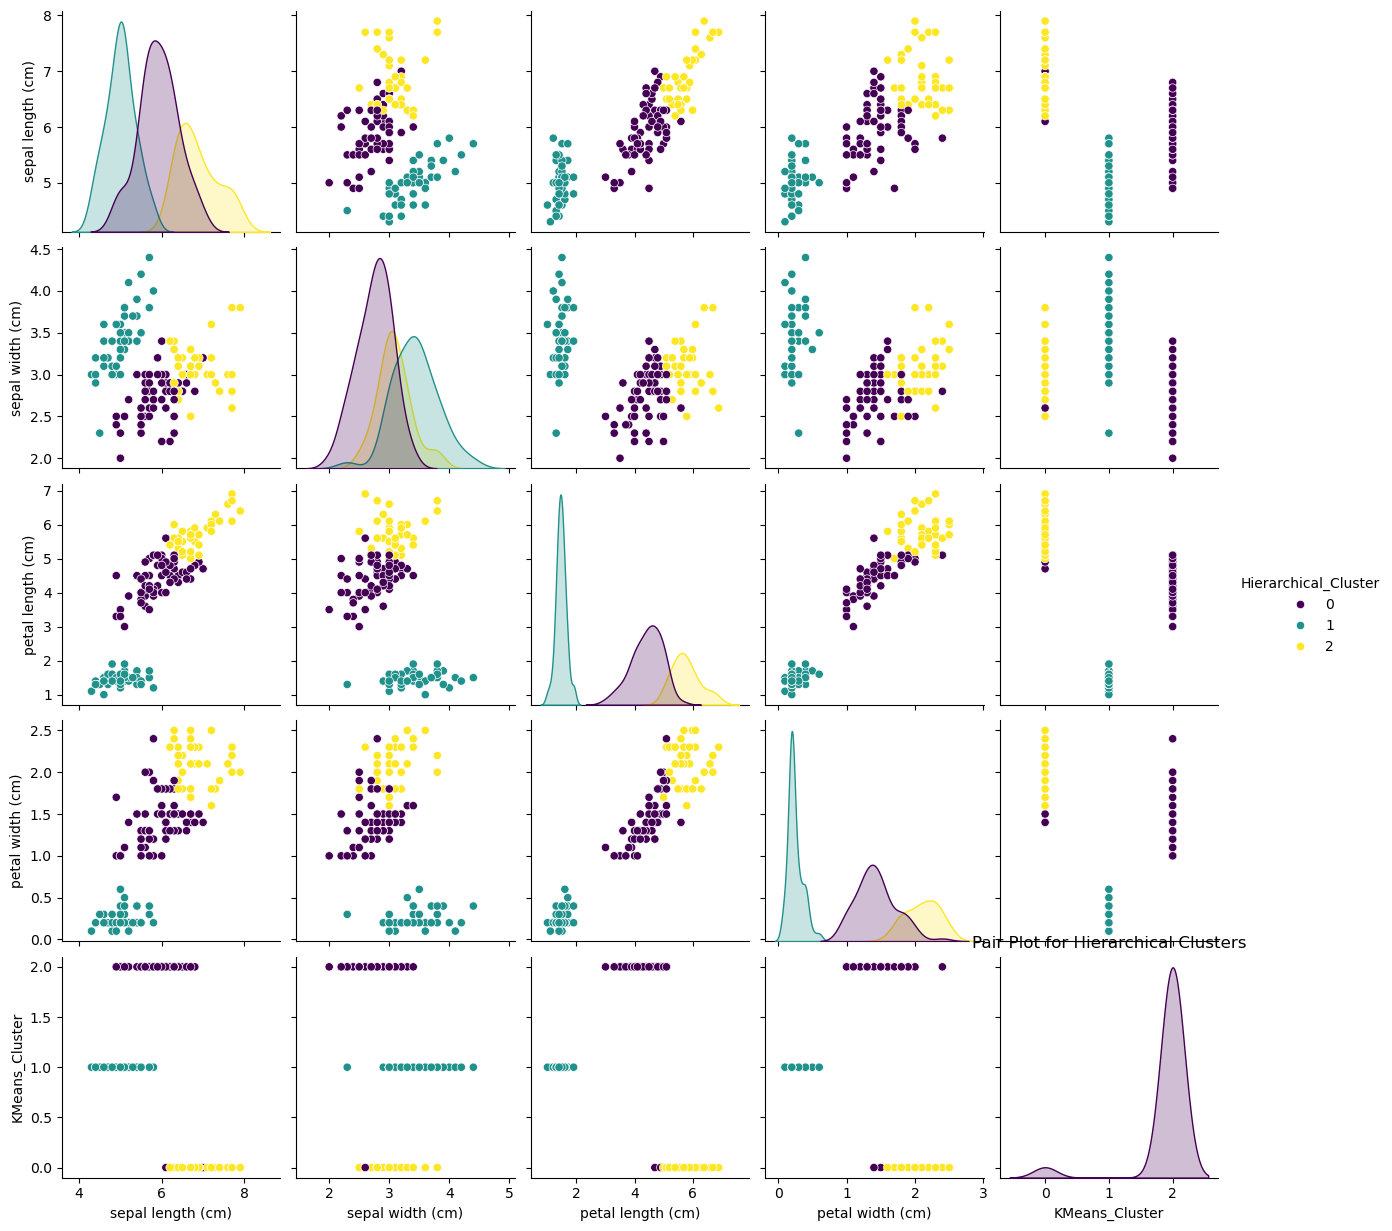

In [43]:
# Pair plot with Hierarchical Clustering clusters
sns.pairplot(X_iris, hue='Hierarchical_Cluster', palette='viridis')
plt.title('Pair Plot for Hierarchical Clusters')
plt.show()

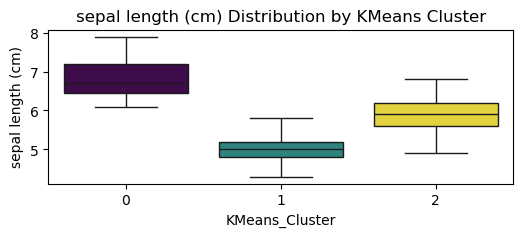

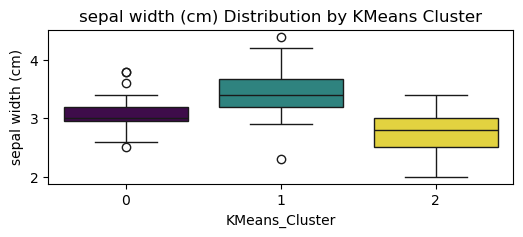

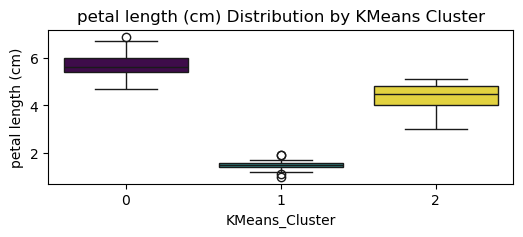

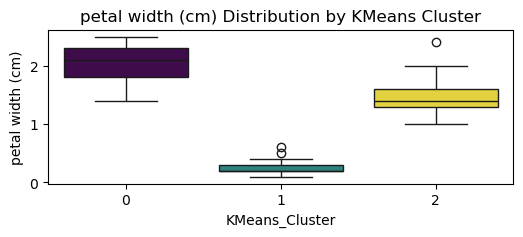

In [47]:
for feature in X_iris.columns[:-2]:  # Exclude the cluster columns
    plt.figure(figsize=(6, 2))

    # Box plot for KMeans clusters
    sns.boxplot(x='KMeans_Cluster', y=feature, hue='KMeans_Cluster', data=X_iris, palette='viridis', dodge=False)
    plt.title(f'{feature} Distribution by KMeans Cluster')
    plt.legend([],[], frameon=False)  # Remove the legend
    plt.show()

    

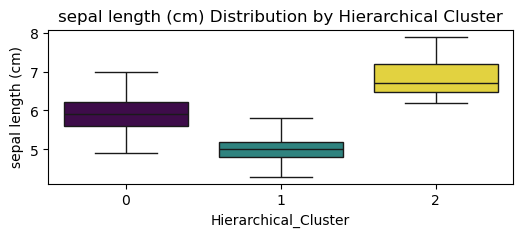

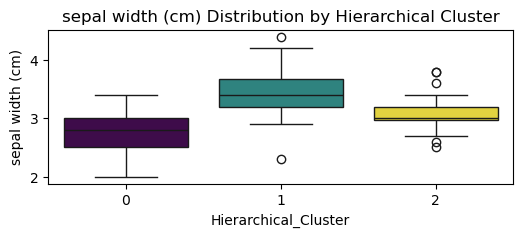

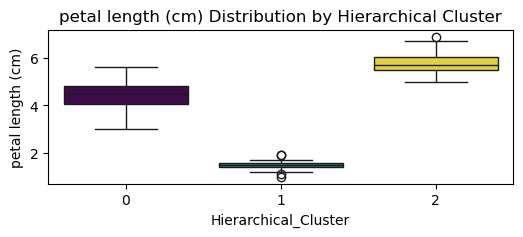

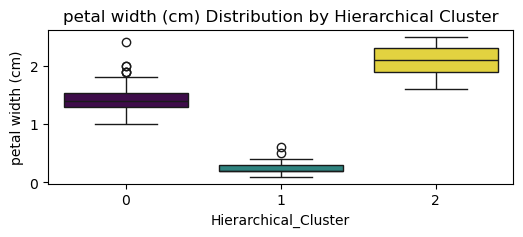

In [48]:
for feature in X_iris.columns[:-2]:  # Exclude the cluster columns
    plt.figure(figsize=(6, 2))
    # Box plot for Hierarchical Clustering clusters
    sns.boxplot(x='Hierarchical_Cluster', y=feature, hue='Hierarchical_Cluster', data=X_iris, palette='viridis', dodge=False)
    plt.title(f'{feature} Distribution by Hierarchical Cluster')
    plt.legend([],[], frameon=False)  # Remove the legend
    plt.show()

### Step 8 :

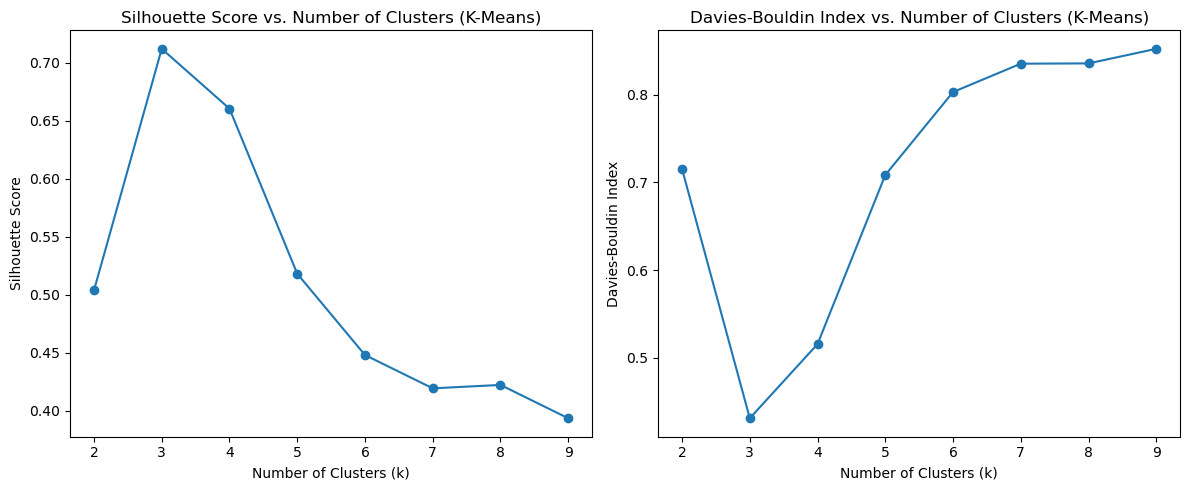

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# List to store the results
k_values = range(2, 10)
silhouette_scores = []
davies_bouldin_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_iris)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_iris, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin Index
    dbi = davies_bouldin_score(X_iris, labels)
    davies_bouldin_indices.append(dbi)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

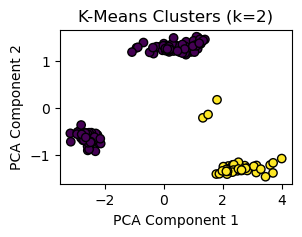

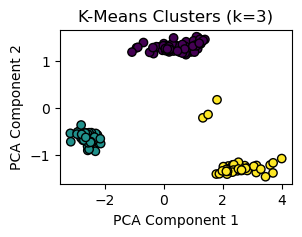

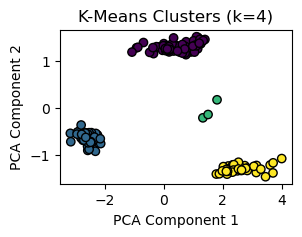

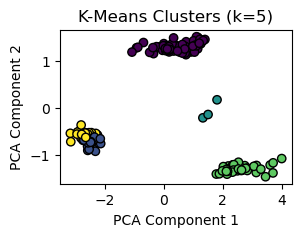

In [51]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_iris)

for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_iris)

    plt.figure(figsize=(3, 2))
    plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(f'K-Means Clusters (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

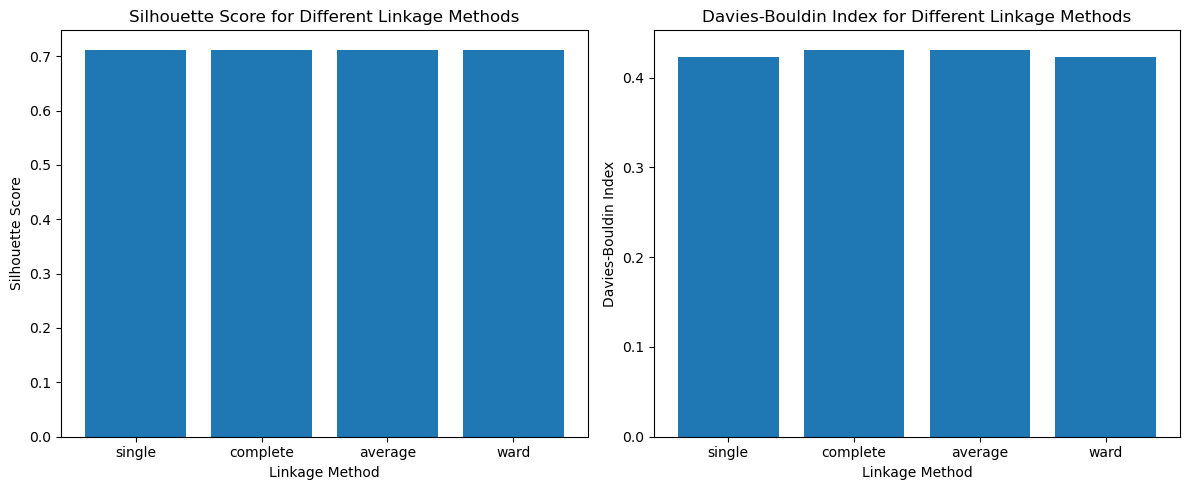

In [52]:
from scipy.cluster.hierarchy import linkage, fcluster
linkage_methods = ['single', 'complete', 'average', 'ward']
silhouette_scores_linkage = []
davies_bouldin_indices_linkage = []

for method in linkage_methods:
    Z = linkage(X_iris, method=method)
    labels = fcluster(Z, t=optimal_clusters_iris, criterion='maxclust')

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_iris, labels)
    silhouette_scores_linkage.append(silhouette_avg)

    # Calculate Davies-Bouldin Index
    dbi = davies_bouldin_score(X_iris, labels)
    davies_bouldin_indices_linkage.append(dbi)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(linkage_methods, silhouette_scores_linkage)
plt.title('Silhouette Score for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.bar(linkage_methods, davies_bouldin_indices_linkage)
plt.title('Davies-Bouldin Index for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

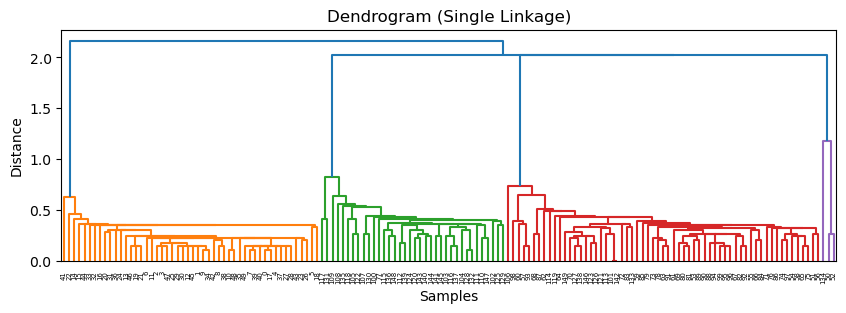

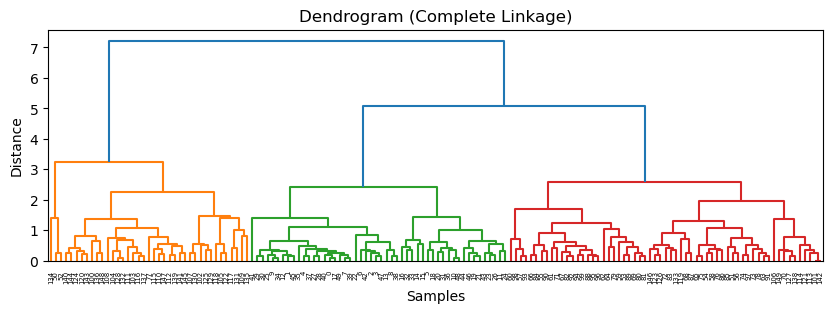

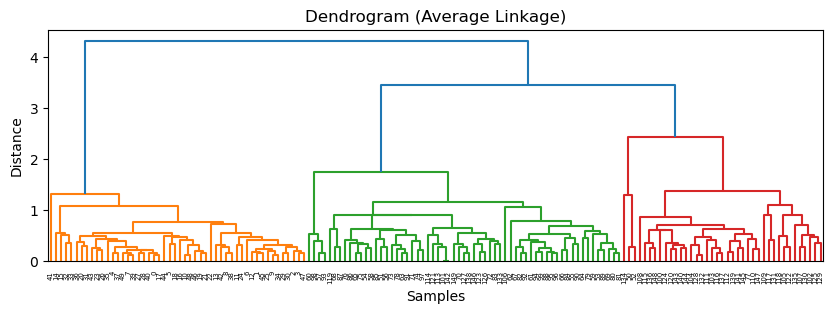

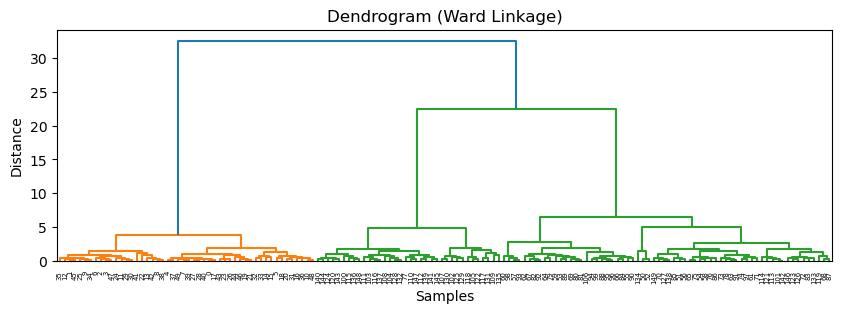

In [54]:
from scipy.cluster.hierarchy import dendrogram

for method in linkage_methods:
    Z = linkage(X_iris, method=method)
    plt.figure(figsize=(10, 3))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

### Mall Customers Dataset

### Step 1 and 2 :

In [15]:
# Load the Mall Customers dataset
file_path = 'Mall_Customers.csv'
mall_df = pd.read_csv(file_path)
mall_df.head(3)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

In [16]:
mall_df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
mall_df.columns[mall_df.isnull().any()]

Index([], dtype='object')

In [18]:
mall_df.describe().T

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mall_df['Genre'] = le.fit_transform(mall_df['Genre'])

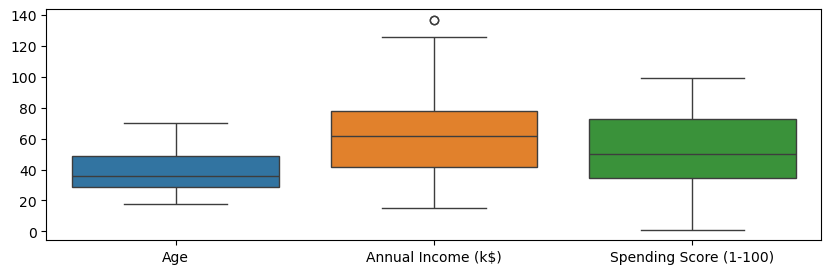

In [57]:
# Box plots to check for outliers
plt.figure(figsize=(10, 3))
sns.boxplot(data=mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

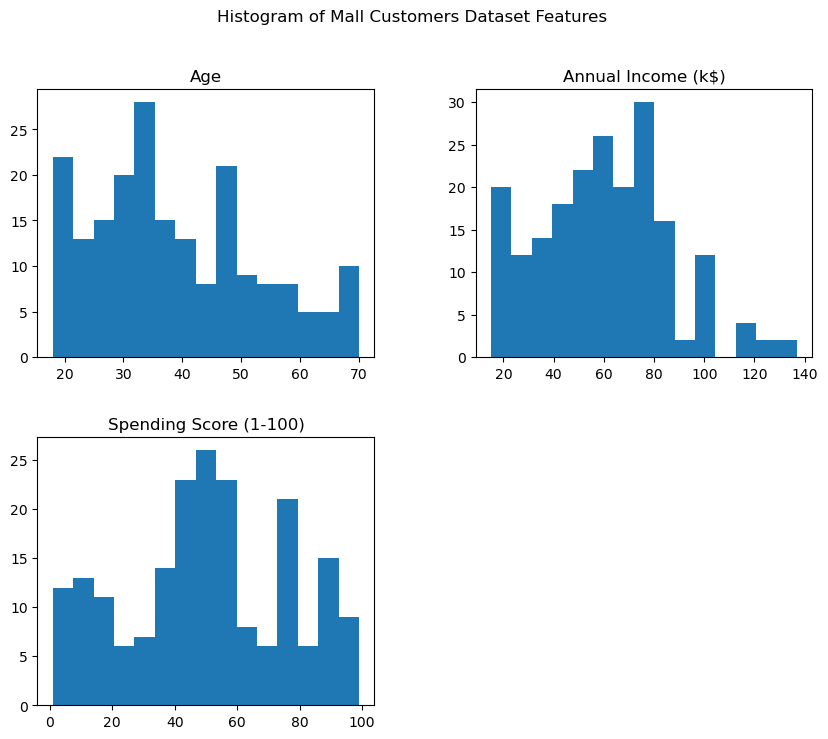

In [58]:
# Plot the distribution of features
mall_df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].hist(bins=15, figsize=(10, 8), grid=False)
plt.suptitle("Histogram of Mall Customers Dataset Features")
plt.show()

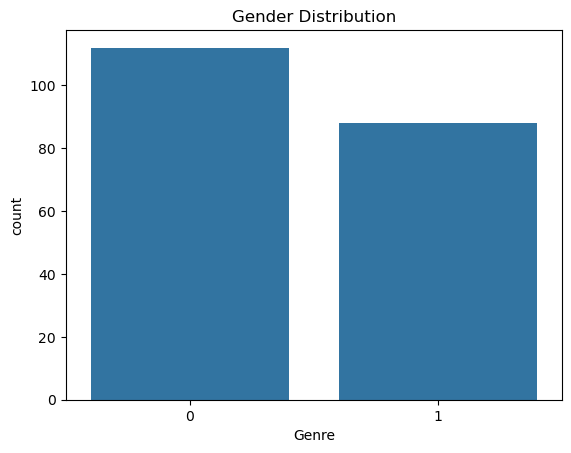

In [60]:
# Count plot for Gender
sns.countplot(x='Genre', data=mall_df)
plt.title('Gender Distribution')
plt.show()

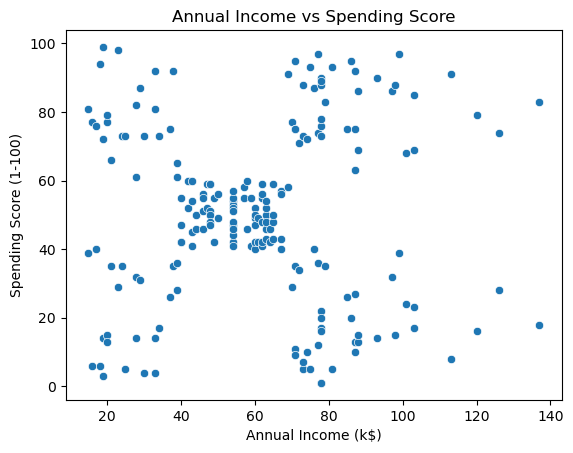

In [21]:
# Visualize relationships between features (Annual Income vs Spending Score)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df)
plt.title("Annual Income vs Spending Score")
plt.show()

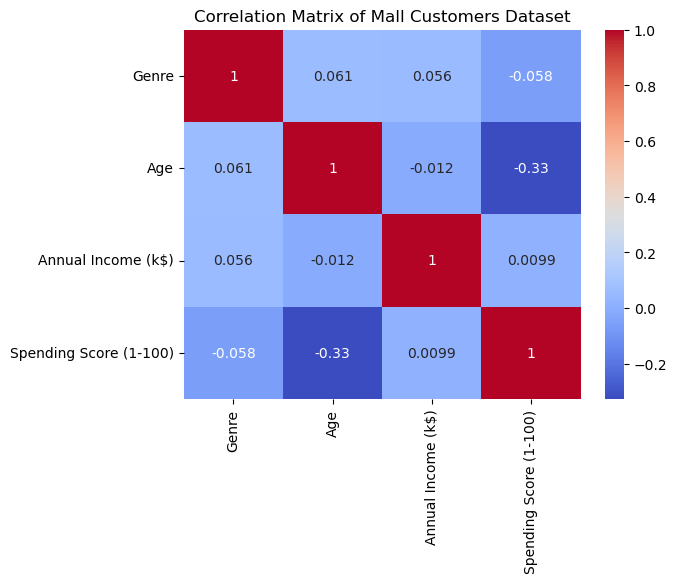

In [22]:
# Compute and display the correlation matrix
correlation_matrix = mall_df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Mall Customers Dataset")
plt.show()

### Step 3 :

In [62]:
# Select features for clustering
X_mall = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [63]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall)

In [65]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_mall_scaled)
    wcss.append(kmeans.inertia_)


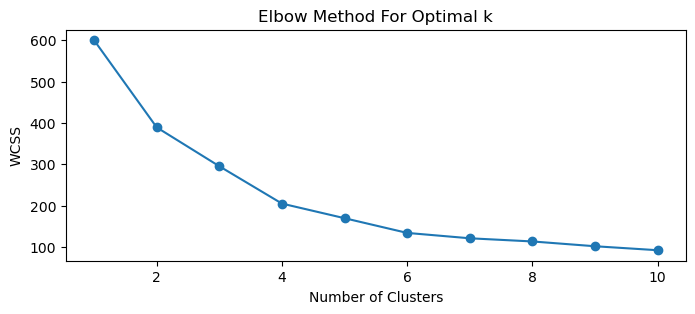

In [67]:
# Plotting the results
plt.figure(figsize=(8, 3))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_mall_scaled)
    silhouette_avg = silhouette_score(X_mall_scaled, labels)
    silhouette_scores.append(silhouette_avg)

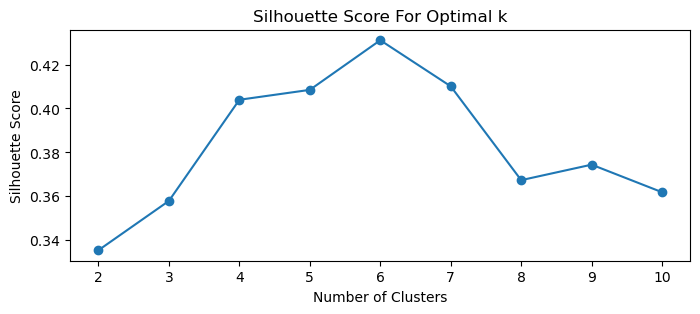

In [69]:
# Plotting the results
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [73]:
# optimal number of clusters is 6 (based on Elbow/Silhouette analysis)
optimal_clusters_mall = 6  # Replace with the optimal number from your analysis

kmeans_mall = KMeans(n_clusters=optimal_clusters_mall, random_state=42)
mall_kmeans_labels = kmeans_mall.fit_predict(X_mall_scaled)

# Add the cluster labels to the original DataFrame
mall_df['KMeans_Cluster'] = mall_kmeans_labels

# Display the first few rows with the cluster labels
mall_df.head(5)

CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      1   19                  15                      39   
1           2      1   21                  15                      81   
2           3      0   20                  16                       6   
3           4      0   23                  16                      77   
4           5      0   31                  17                      40   

   KMeans_Cluster  
0               2  
1               2  
2               5  
3               2  
4               5

### Step 4 :

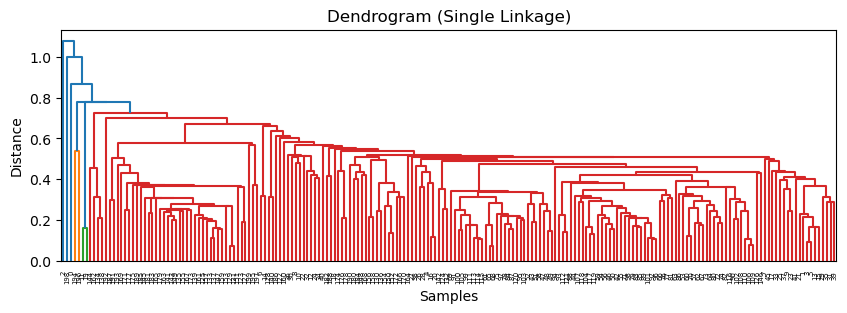

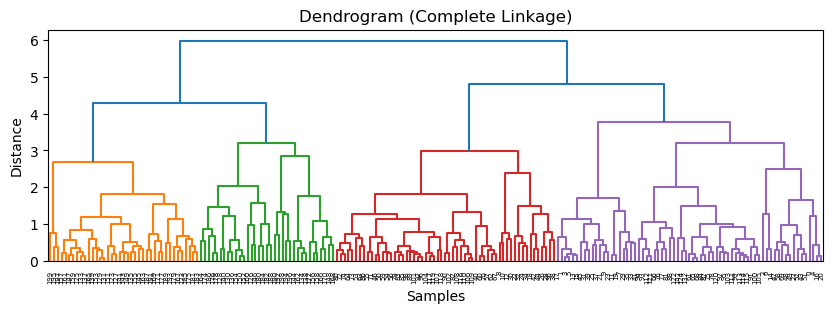

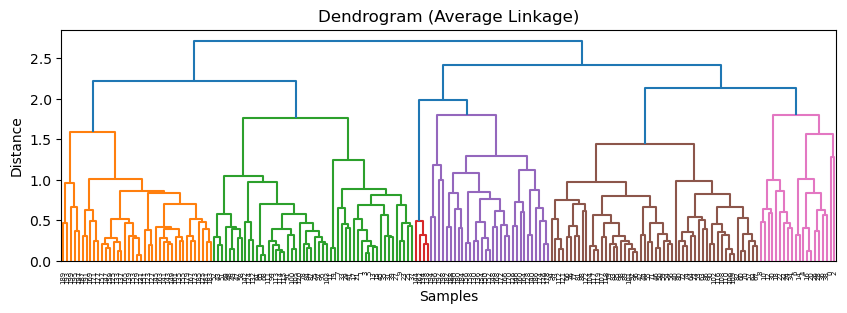

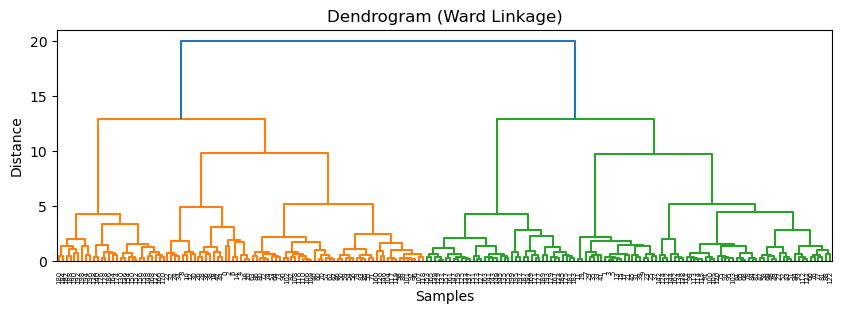

In [75]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Define linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
linkage_dict = {}

# Perform hierarchical clustering with different linkage methods
for method in linkage_methods:
    Z = linkage(X_mall_scaled, method=method)
    linkage_dict[method] = Z

    # Plot dendrogram for each linkage method
    plt.figure(figsize=(10, 3))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

In [76]:
# Example: Choosing 6 clusters (same as K-Means for consistency)
optimal_clusters = 6
hierarchical_clusters = {}

for method, Z in linkage_dict.items():
    labels = fcluster(Z, t=optimal_clusters, criterion='maxclust')
    hierarchical_clusters[method] = labels

# Add the cluster labels to the original DataFrame for each linkage method
for method, labels in hierarchical_clusters.items():
    mall_df[f'Hierarchical_Cluster_{method}'] = labels

# Display the first few rows with the hierarchical cluster labels
mall_df.head(5)

CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      1   19                  15                      39   
1           2      1   21                  15                      81   
2           3      0   20                  16                       6   
3           4      0   23                  16                      77   
4           5      0   31                  17                      40   

   KMeans_Cluster  Hierarchical_Cluster_single  Hierarchical_Cluster_complete  \
0               2                            4                              6   
1               2                            3                              4   
2               5                            6                              6   
3               2                            3                              4   
4               5                            3                              6   

   Hierarchical_Cluster_average  Hierarchical_Cluster_ward  
0                             6                          2  
1                             2                          5  
2                             6                          2  
3                             2                          5  
4                             6                          2

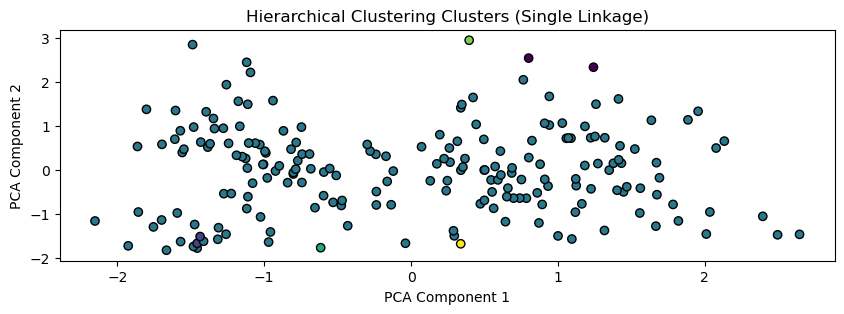

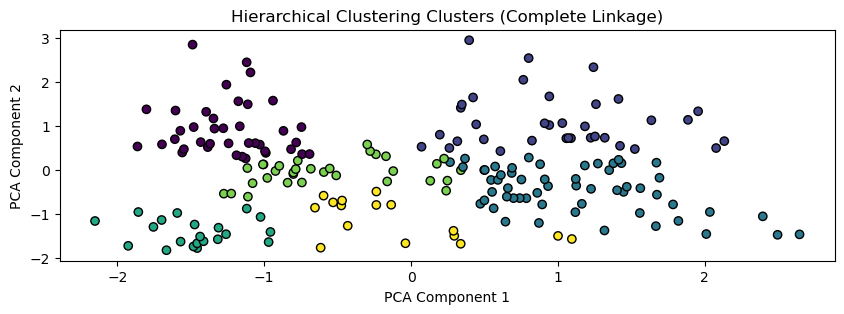

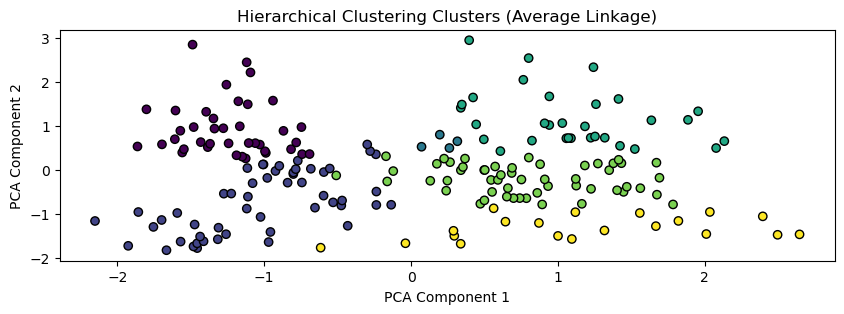

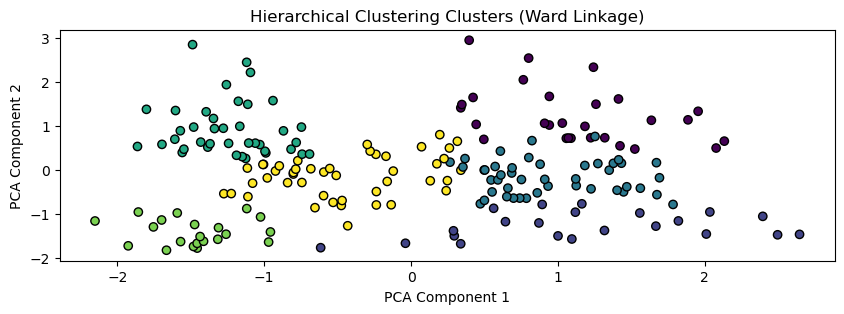

In [78]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(X_mall_scaled)

# Visualize clusters for each linkage method
for method, labels in hierarchical_clusters.items():
    plt.figure(figsize=(10, 3))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(f'Hierarchical Clustering Clusters ({method.capitalize()} Linkage)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

### Step 5 :

In [79]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_mall_pca = pca.fit_transform(X_mall_scaled)

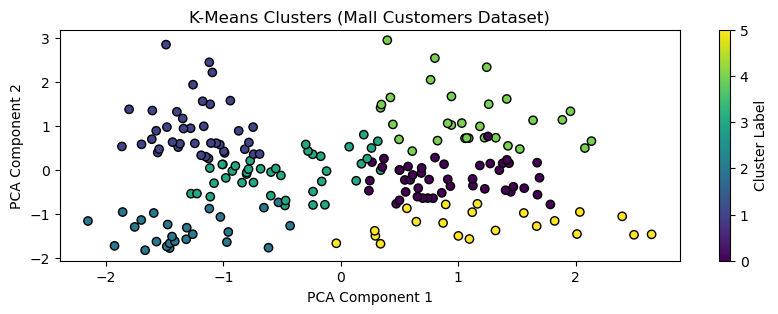

In [81]:
# Plot K-Means clusters
plt.figure(figsize=(10, 3))
plt.scatter(X_mall_pca[:, 0], X_mall_pca[:, 1], c=mall_df['KMeans_Cluster'], cmap='viridis', edgecolor='k')
plt.title('K-Means Clusters (Mall Customers Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

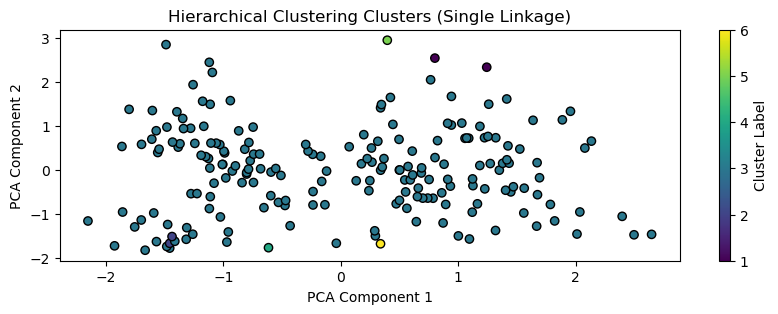

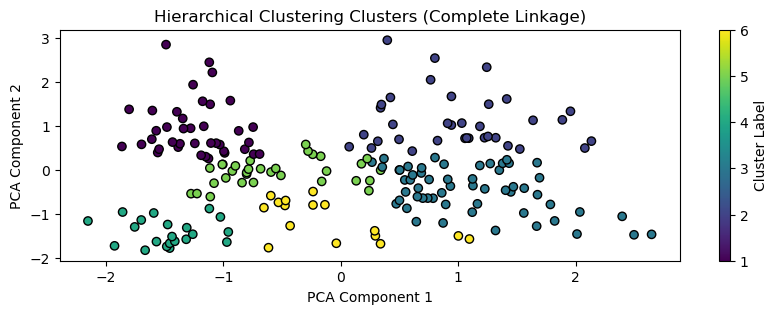

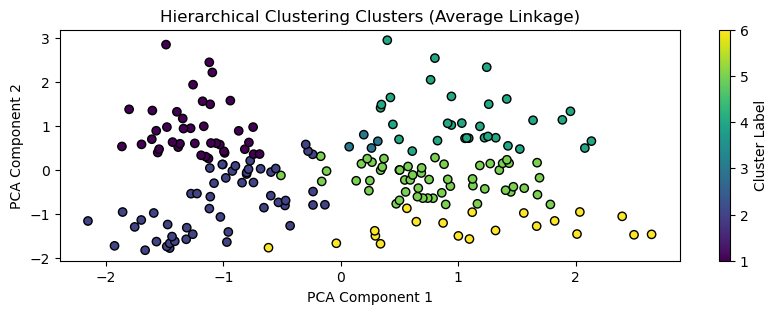

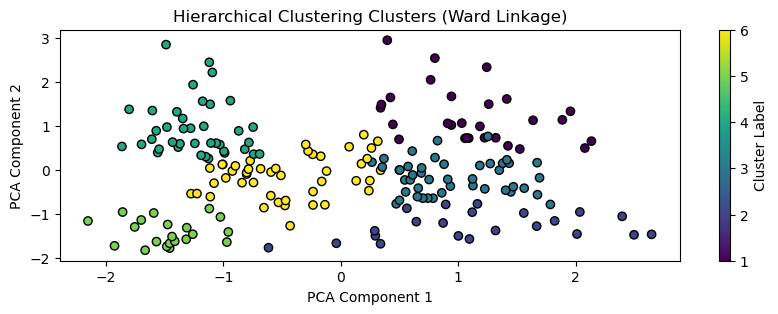

In [82]:
# Plot Hierarchical Clustering clusters for each linkage method
for method in ['single', 'complete', 'average', 'ward']:
    plt.figure(figsize=(10, 3))
    plt.scatter(X_mall_pca[:, 0], X_mall_pca[:, 1], c=mall_df[f'Hierarchical_Cluster_{method}'], cmap='viridis', edgecolor='k')
    plt.title(f'Hierarchical Clustering Clusters ({method.capitalize()} Linkage)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [83]:
# Compute the mean values of features for each cluster
kmeans_cluster_summary = mall_df.groupby('KMeans_Cluster').mean()
hierarchical_cluster_summaries = {}

for method in ['single', 'complete', 'average', 'ward']:
    hierarchical_cluster_summaries[method] = mall_df.groupby(f'Hierarchical_Cluster_{method}').mean()

# Print summaries
print("K-Means Cluster Summary:")
print(kmeans_cluster_summary)

print("\nHierarchical Clustering Cluster Summaries:")
for method, summary in hierarchical_cluster_summaries.items():
    print(f"\n{method.capitalize()} Linkage:")
    print(summary)


K-Means Cluster Summary:
                CustomerID     Genre        Age  Annual Income (k$)  \
KMeans_Cluster                                                        
0                83.777778  0.422222  56.333333           54.266667   
1               162.000000  0.461538  32.692308           86.538462   
2                24.200000  0.440000  25.560000           26.480000   
3                97.700000  0.400000  26.125000           59.425000   
4               167.066667  0.533333  44.000000           90.133333   
5                23.190476  0.380952  45.523810           26.285714   

                Spending Score (1-100)  Hierarchical_Cluster_single  \
KMeans_Cluster                                                        
0                            49.066667                     3.000000   
1                            82.128205                     3.000000   
2                            76.240000                     2.960000   
3                            44.450000             

### Step 6 :

In [84]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for K-Means
silhouette_kmeans_mall = silhouette_score(X_mall_scaled, mall_df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means Clustering (Mall Customers Dataset): {silhouette_kmeans_mall}')

Silhouette Score for K-Means Clustering (Mall Customers Dataset): 0.43106526216603014


In [85]:
# Compute Silhouette Scores for Hierarchical Clustering with different linkage methods
silhouette_hierarchical = {}

for method in ['single', 'complete', 'average', 'ward']:
    labels = mall_df[f'Hierarchical_Cluster_{method}']
    silhouette_hierarchical[method] = silhouette_score(X_mall_scaled, labels)
    print(f'Silhouette Score for Hierarchical Clustering ({method.capitalize()} Linkage): {silhouette_hierarchical[method]}')

Silhouette Score for Hierarchical Clustering (Single Linkage): -0.04275003780616146
Silhouette Score for Hierarchical Clustering (Complete Linkage): 0.37456111132591957
Silhouette Score for Hierarchical Clustering (Average Linkage): 0.38957308601543233
Silhouette Score for Hierarchical Clustering (Ward Linkage): 0.4201169558789579


In [86]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index for K-Means
dbi_kmeans_mall = davies_bouldin_score(X_mall_scaled, mall_df['KMeans_Cluster'])
print(f'Davies-Bouldin Index for K-Means Clustering (Mall Customers Dataset): {dbi_kmeans_mall}')

Davies-Bouldin Index for K-Means Clustering (Mall Customers Dataset): 0.8349663784782572


In [87]:
# Compute Davies-Bouldin Index for Hierarchical Clustering with different linkage methods
dbi_hierarchical = {}

for method in ['single', 'complete', 'average', 'ward']:
    labels = mall_df[f'Hierarchical_Cluster_{method}']
    dbi_hierarchical[method] = davies_bouldin_score(X_mall_scaled, labels)
    print(f'Davies-Bouldin Index for Hierarchical Clustering ({method.capitalize()} Linkage): {dbi_hierarchical[method]}')

Davies-Bouldin Index for Hierarchical Clustering (Single Linkage): 0.6369704199449976
Davies-Bouldin Index for Hierarchical Clustering (Complete Linkage): 1.00049248988022
Davies-Bouldin Index for Hierarchical Clustering (Average Linkage): 0.8646021346720328
Davies-Bouldin Index for Hierarchical Clustering (Ward Linkage): 0.8521020845733146


### Step 7 :

In [89]:
# Compute the mean values of features for each K-Means cluster
kmeans_cluster_summary = mall_df.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Summary:")
kmeans_cluster_summary

K-Means Cluster Summary:


CustomerID     Genre        Age  Annual Income (k$)  \
KMeans_Cluster                                                        
0                83.777778  0.422222  56.333333           54.266667   
1               162.000000  0.461538  32.692308           86.538462   
2                24.200000  0.440000  25.560000           26.480000   
3                97.700000  0.400000  26.125000           59.425000   
4               167.066667  0.533333  44.000000           90.133333   
5                23.190476  0.380952  45.523810           26.285714   

                Spending Score (1-100)  Hierarchical_Cluster_single  \
KMeans_Cluster                                                        
0                            49.066667                     3.000000   
1                            82.128205                     3.000000   
2                            76.240000                     2.960000   
3                            44.450000                     3.000000   
4                            17.933333                     2.933333   
5                            19.380952                     3.142857   

                Hierarchical_Cluster_complete  Hierarchical_Cluster_average  \
KMeans_Cluster                                                                
0                                    3.066667                      4.977778   
1                                    1.000000                      1.000000   
2                                    4.320000                      2.160000   
3                                    4.850000                      2.700000   
4                                    2.000000                      4.000000   
5                                    3.857143                      5.904762   

                Hierarchical_Cluster_ward  
KMeans_Cluster                             
0                                3.133333  
1                                4.000000  
2                                5.000000  
3                                6.000000  
4                                1.133333  
5                                2.000000

In [92]:
# Compute the mean values of features for each Hierarchical Clustering cluster
hierarchical_cluster_summaries = {}

for method in ['single', 'complete', 'average', 'ward']:
    hierarchical_cluster_summaries[method] = mall_df.groupby(f'Hierarchical_Cluster_{method}').mean()
    print(f"\nHierarchical Clustering Summary ({method.capitalize()} Linkage):")
    print(hierarchical_cluster_summaries[method])


Hierarchical Clustering Summary (Single Linkage):
                             CustomerID     Genre        Age  \
Hierarchical_Cluster_single                                    
1                            196.000000  0.000000  46.000000   
2                             16.000000  0.000000  35.000000   
3                            100.896373  0.445596  39.051813   
4                              1.000000  1.000000  19.000000   
5                            199.000000  1.000000  32.000000   
6                              3.000000  0.000000  20.000000   

                             Annual Income (k$)  Spending Score (1-100)  \
Hierarchical_Cluster_single                                               
1                                    123.000000               22.000000   
2                                     21.000000               98.500000   
3                                     60.393782               50.445596   
4                                     15.000000              

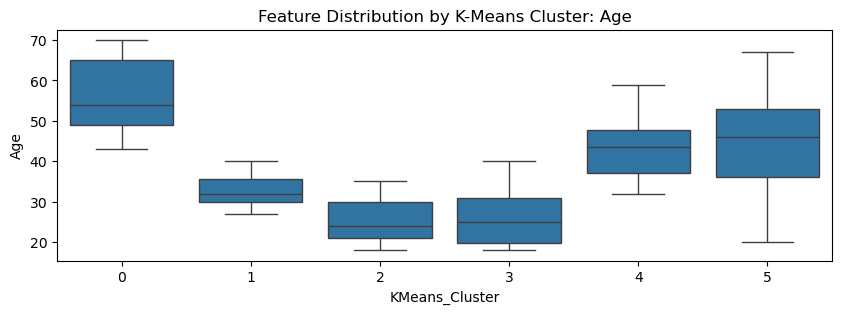

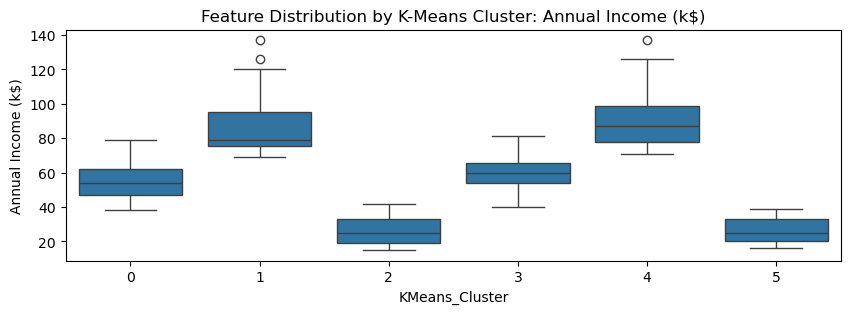

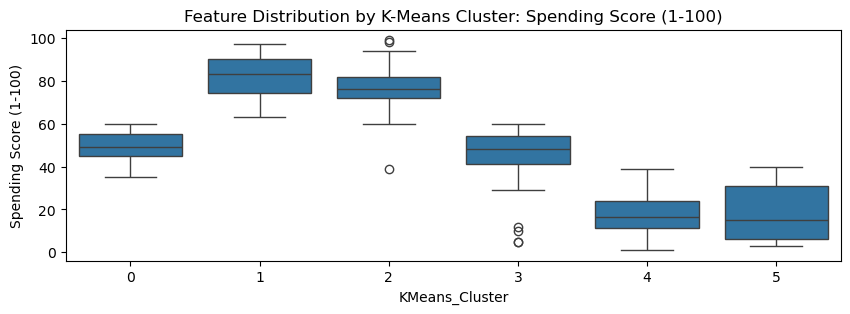

In [95]:
# Plot box plots for K-Means clusters
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x='KMeans_Cluster', y=feature, data=mall_df)
    plt.title(f'Feature Distribution by K-Means Cluster: {feature}')
    plt.show()

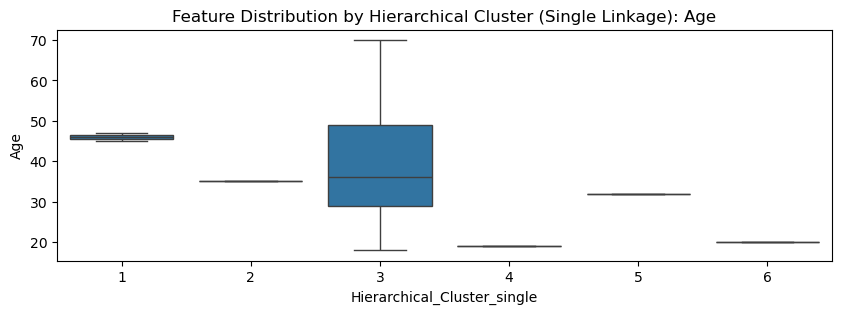

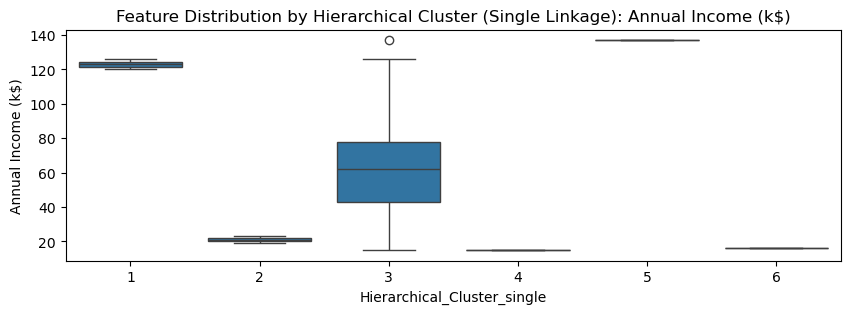

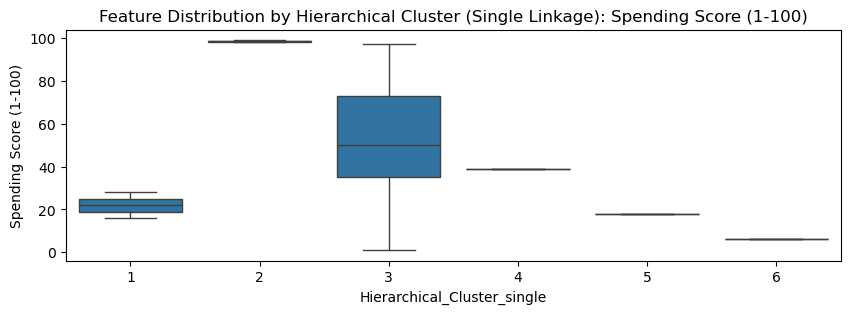

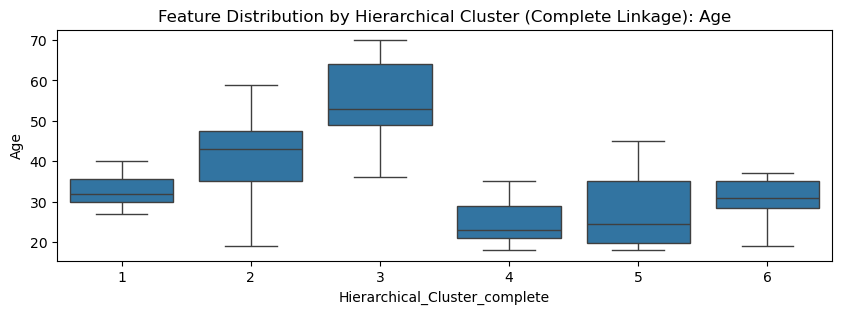

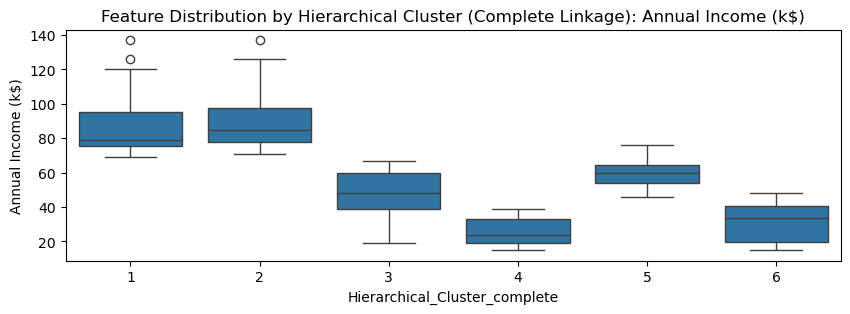

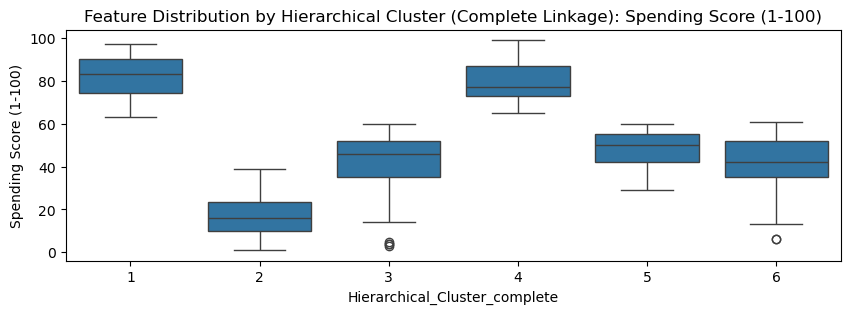

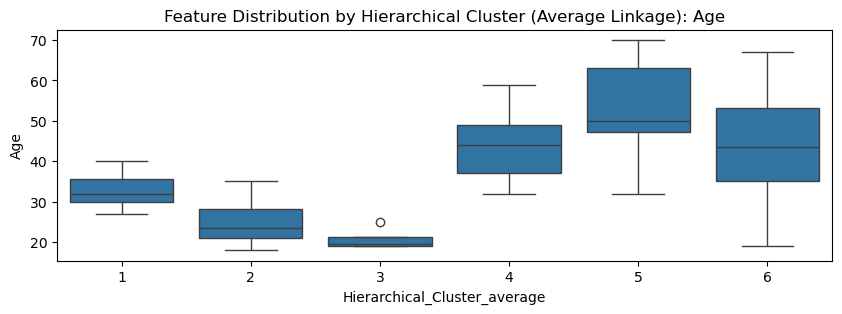

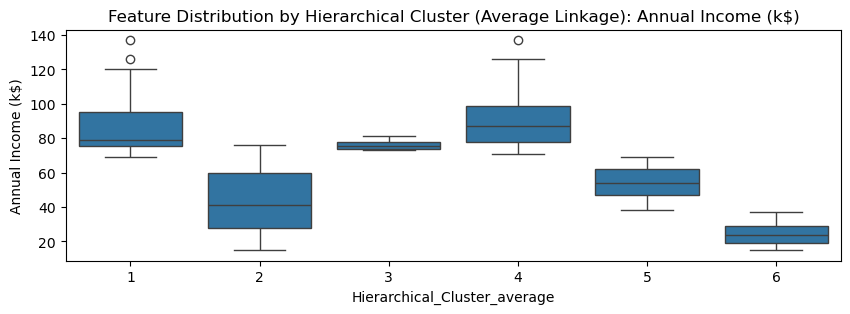

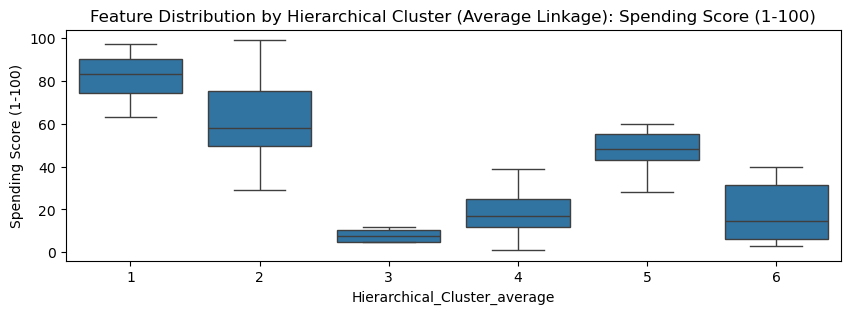

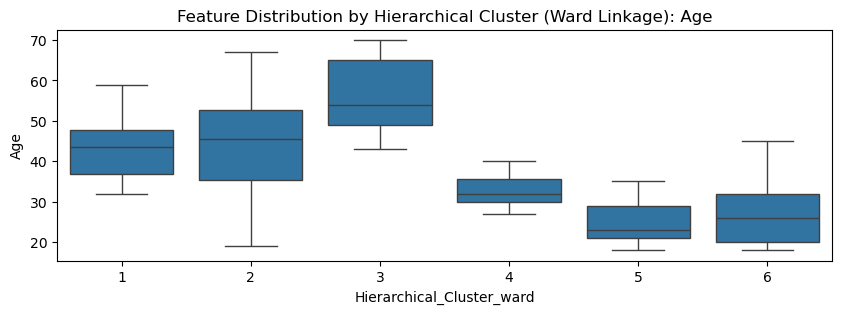

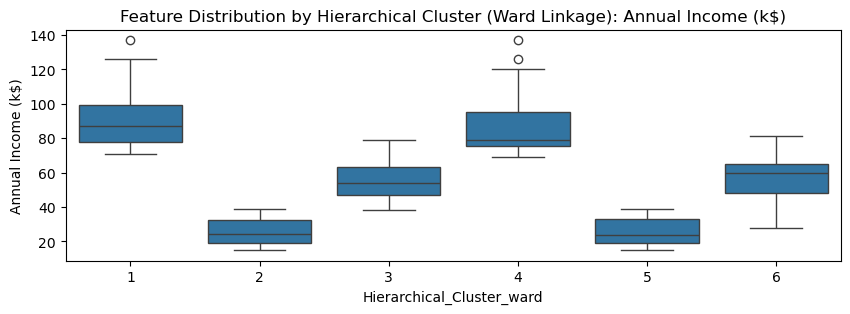

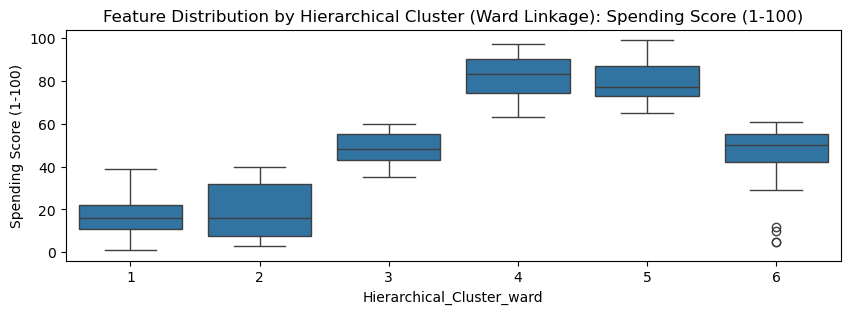

In [96]:
# Plot box plots for Hierarchical Clustering clusters
for method in ['single', 'complete', 'average', 'ward']:
    for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        plt.figure(figsize=(10, 3))
        sns.boxplot(x=f'Hierarchical_Cluster_{method}', y=feature, data=mall_df)
        plt.title(f'Feature Distribution by Hierarchical Cluster ({method.capitalize()} Linkage): {feature}')
        plt.show()

### Step 8 :

In [97]:
# List of different cluster numbers to test
cluster_numbers = [4, 5, 6, 7, 8]

# Store summaries for different cluster numbers
kmeans_summaries = {}

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_mall_scaled)
    mall_df[f'KMeans_Cluster_{n_clusters}'] = labels

    # Compute summary statistics
    kmeans_summaries[n_clusters] = mall_df.groupby(f'KMeans_Cluster_{n_clusters}').mean()
    print(f"\nK-Means Summary with {n_clusters} Clusters:")
    print(kmeans_summaries[n_clusters])


K-Means Summary with 4 Clusters:
                  CustomerID     Genre        Age  Annual Income (k$)  \
KMeans_Cluster_4                                                        
0                  69.415385  0.430769  53.984615           47.707692   
1                 161.025000  0.450000  32.875000           86.100000   
2                  53.438596  0.403509  25.438596           40.000000   
3                 160.552632  0.500000  39.368421           86.500000   

                  Spending Score (1-100)  KMeans_Cluster  \
KMeans_Cluster_4                                           
0                              39.969231        1.461538   
1                              81.525000        1.050000   
2                              60.298246        2.701754   
3                              19.578947        3.763158   

                  Hierarchical_Cluster_single  Hierarchical_Cluster_complete  \
KMeans_Cluster_4                                                               
0     

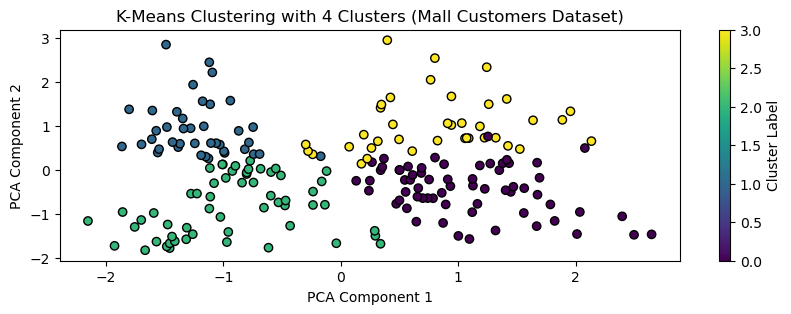

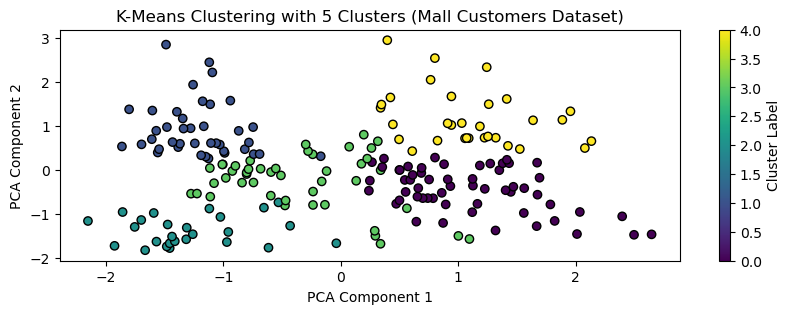

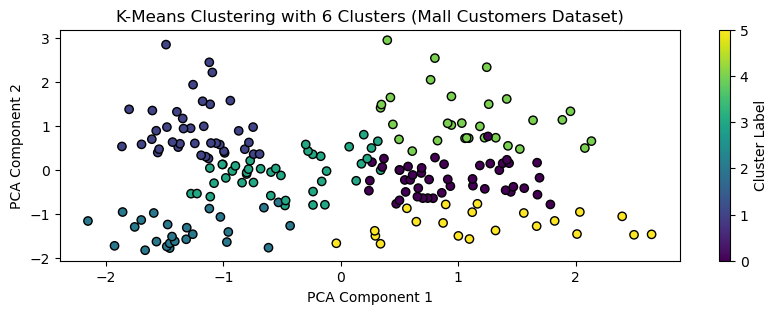

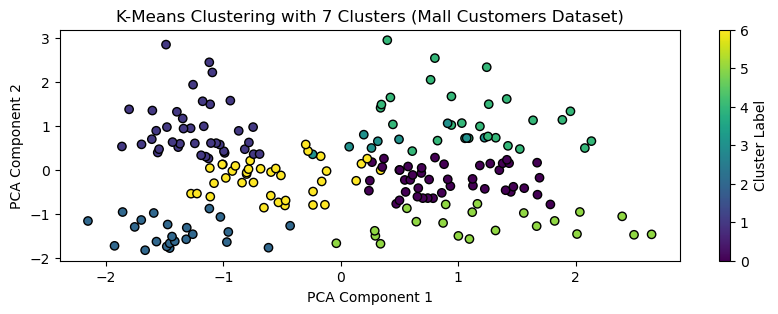

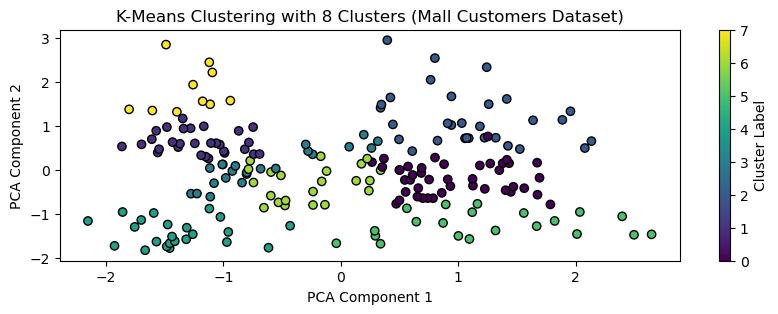

In [98]:
# Plot K-Means clusters for different cluster numbers
for n_clusters in cluster_numbers:
    plt.figure(figsize=(10, 3))
    plt.scatter(X_mall_pca[:, 0], X_mall_pca[:, 1], c=mall_df[f'KMeans_Cluster_{n_clusters}'], cmap='viridis', edgecolor='k')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters (Mall Customers Dataset)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [99]:
# Store summaries for different linkage methods
hierarchical_summaries = {}

for method in ['single', 'complete', 'average', 'ward']:
    labels = mall_df[f'Hierarchical_Cluster_{method}']
    hierarchical_summaries[method] = mall_df.groupby(f'Hierarchical_Cluster_{method}').mean()
    print(f"\nHierarchical Clustering Summary ({method.capitalize()} Linkage):")
    print(hierarchical_summaries[method])


Hierarchical Clustering Summary (Single Linkage):
                             CustomerID     Genre        Age  \
Hierarchical_Cluster_single                                    
1                            196.000000  0.000000  46.000000   
2                             16.000000  0.000000  35.000000   
3                            100.896373  0.445596  39.051813   
4                              1.000000  1.000000  19.000000   
5                            199.000000  1.000000  32.000000   
6                              3.000000  0.000000  20.000000   

                             Annual Income (k$)  Spending Score (1-100)  \
Hierarchical_Cluster_single                                               
1                                    123.000000               22.000000   
2                                     21.000000               98.500000   
3                                     60.393782               50.445596   
4                                     15.000000              

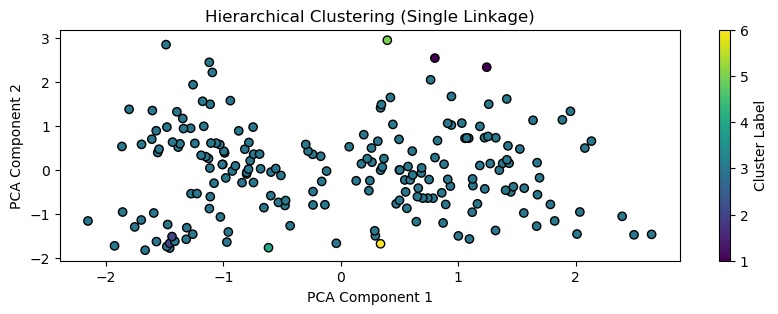

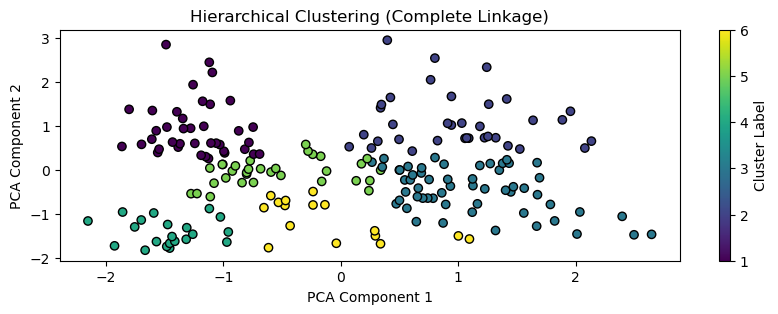

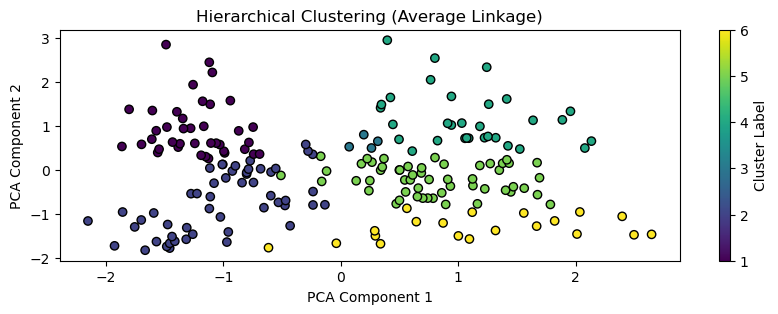

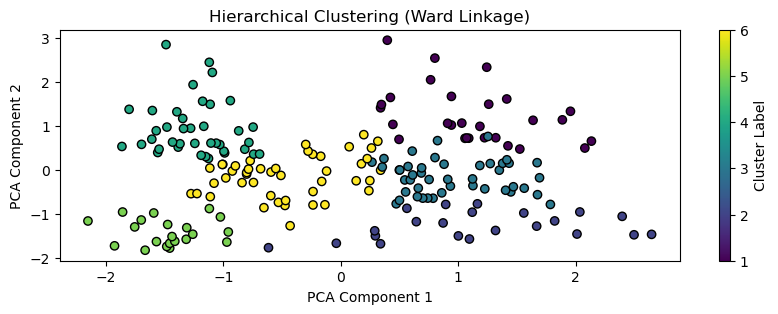

In [101]:
# Plot Hierarchical Clustering clusters for different linkage methods
for method in ['single', 'complete', 'average', 'ward']:
    plt.figure(figsize=(10, 3))
    plt.scatter(X_mall_pca[:, 0], X_mall_pca[:, 1], c=mall_df[f'Hierarchical_Cluster_{method}'], cmap='viridis', edgecolor='k')
    plt.title(f'Hierarchical Clustering ({method.capitalize()} Linkage)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

### Step 9 :

In [102]:
# Silhouette Scores for K-Means and Hierarchical Clustering in Iris Dataset
print(f'Silhouette Score for K-Means (Iris Dataset): {silhouette_kmeans_iris}')
print(f'Silhouette Score for Hierarchical Clustering (Iris Dataset): {silhouette_hierarchical_iris}')

# Silhouette Scores for K-Means and Hierarchical Clustering in Mall Customers Dataset
print(f'Silhouette Score for K-Means (Mall Customers Dataset): {silhouette_kmeans_mall}')
for method in ['single', 'complete', 'average', 'ward']:
    print(f'Silhouette Score for Hierarchical Clustering ({method.capitalize()} Linkage) (Mall Customers Dataset): {silhouette_hierarchical[method]}')

Silhouette Score for K-Means (Iris Dataset): 0.5511916046195919
Silhouette Score for Hierarchical Clustering (Iris Dataset): 0.554323661129642
Silhouette Score for K-Means (Mall Customers Dataset): 0.43106526216603014
Silhouette Score for Hierarchical Clustering (Single Linkage) (Mall Customers Dataset): -0.04275003780616146
Silhouette Score for Hierarchical Clustering (Complete Linkage) (Mall Customers Dataset): 0.37456111132591957
Silhouette Score for Hierarchical Clustering (Average Linkage) (Mall Customers Dataset): 0.38957308601543233
Silhouette Score for Hierarchical Clustering (Ward Linkage) (Mall Customers Dataset): 0.4201169558789579


In [103]:
# Davies-Bouldin Index for K-Means and Hierarchical Clustering in Iris Dataset
print(f'Davies-Bouldin Index for K-Means (Iris Dataset): {dbi_kmeans_iris}')
print(f'Davies-Bouldin Index for Hierarchical Clustering (Iris Dataset): {dbi_hierarchical_iris}')

# Davies-Bouldin Index for K-Means and Hierarchical Clustering in Mall Customers Dataset
print(f'Davies-Bouldin Index for K-Means (Mall Customers Dataset): {dbi_kmeans_mall}')
for method in ['single', 'complete', 'average', 'ward']:
    print(f'Davies-Bouldin Index for Hierarchical Clustering ({method.capitalize()} Linkage) (Mall Customers Dataset): {dbi_hierarchical[method]}')

Davies-Bouldin Index for K-Means (Iris Dataset): 0.6660385791628491
Davies-Bouldin Index for Hierarchical Clustering (Iris Dataset): 0.656256454064201
Davies-Bouldin Index for K-Means (Mall Customers Dataset): 0.8349663784782572
Davies-Bouldin Index for Hierarchical Clustering (Single Linkage) (Mall Customers Dataset): 0.6369704199449976
Davies-Bouldin Index for Hierarchical Clustering (Complete Linkage) (Mall Customers Dataset): 1.00049248988022
Davies-Bouldin Index for Hierarchical Clustering (Average Linkage) (Mall Customers Dataset): 0.8646021346720328
Davies-Bouldin Index for Hierarchical Clustering (Ward Linkage) (Mall Customers Dataset): 0.8521020845733146
